Original

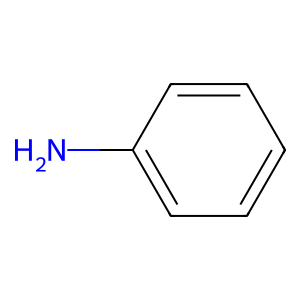

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

target = Chem.MolFromSmiles('C1=CC=C(C=C1)N')
Draw.MolToImage(target)

Euclidiana

52410    N=c1ccccnn1
Name: smile, dtype: object
N=c1ccccnn1
Nc1ccccn1
Nc1ccccc1
N=c1nccccn1
N=c1ncccnn1
N=c1cccccn1
Nc1cccccc1=O
Nc1ccccc1F
Nc1ccccc1O
Nc1ccccc1N


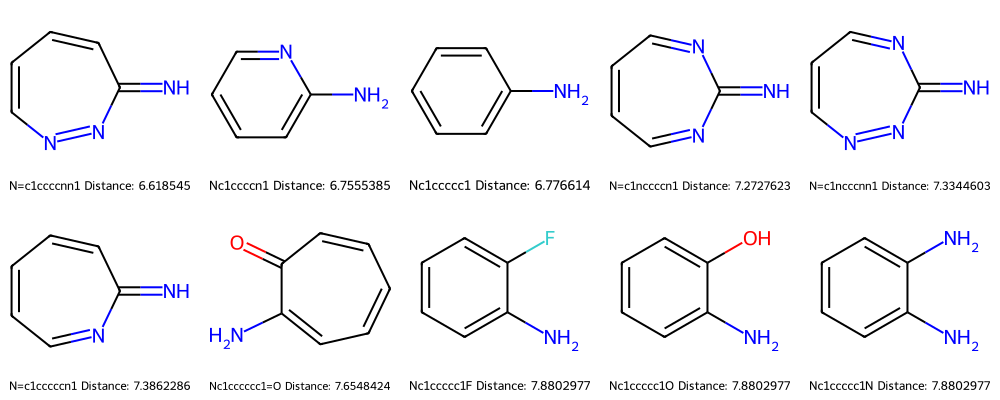

In [3]:
import pandas as pd
from torch_geometric.data import Data
# load csv
df = pd.read_csv('distancias_contrastive_256.csv')
#df = pd.read_csv('distancias_1.csv')
# Print best smile
print(df.sort_values('distance').head(1)['smile'])

top =[]
top_legends = []
for i in range(10):
    best_graph = df.sort_values('distance').head(10)['smile'].values[i]
    print(best_graph)
    mol = Chem.MolFromSmiles(best_graph)
    top.append(mol)
    best_graph = best_graph + ' Distance: ' + str(df.sort_values('distance').head(10)['distance'].values[i])
    top_legends.append(best_graph)

#Draw.MolToImage(top[0])
Draw.MolsToGridImage(mols=top, molsPerRow=5, legends=top_legends)

Mahalanobis

315685    Nc1cccccc1=O
Name: smile, dtype: object
Nc1cccccc1=O
Nn1ccccc1=N
Nc1ccccc1
Nc1ccccn1
N=c1ccccnn1
N=c1nccccn1
Nc1ccccc1F
Nc1ccccc1N
Nc1ccccc1O
Nc1ccccc1C=C


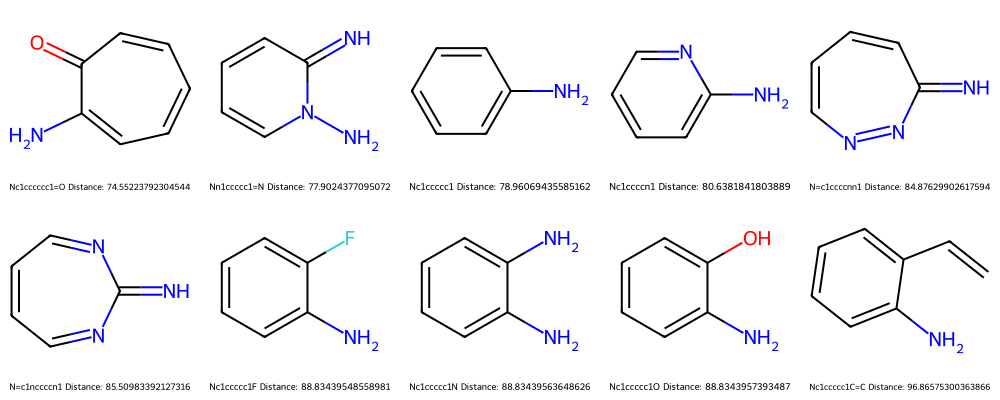

In [4]:
print(df.sort_values('mahalanobis').head(1)['smile'])

top =[]
top_legends = []
for i in range(10):
    best_graph = df.sort_values('mahalanobis').head(10)['smile'].values[i]
    print(best_graph)
    mol = Chem.MolFromSmiles(best_graph)
    top.append(mol)
    best_graph = best_graph + ' Distance: ' + str(df.sort_values('mahalanobis').head(10)['mahalanobis'].values[i])
    top_legends.append(best_graph)

#Draw.MolToImage(top[0])
Draw.MolsToGridImage(mols=top, molsPerRow=5, legends=top_legends)

Visualizar Embeddings

In [ ]:

#Visualize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

import torch
    
df = torch.load('embeddings_contrastive.pt')
data = df['embeddings']
labels = df['labels']

# Step 1: Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Step 2: Create a scatterplot

plt.figure(figsize=(10, 6))

# Get unique labels and assign a color to each
unique_labels = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Use a colormap like 'tab10'

for label, color in zip(unique_labels, colors):
    plt.scatter(
        reduced_data[labels == label, 0],  # X-axis values for this label
        reduced_data[labels == label, 1],  # Y-axis values for this label
        color=color,  # Color for this label
        alpha=0.5,    # Transparency
        label=f"Numero: {label}"  # Label for the legend
    )

plt.title("Visualización 2D con PCA:")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()

C:\Users\locua\AppData\Local\Temp\ipykernel_12408\2323824920.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  df = torch.load('embeddings_contrastive.pt')


KeyboardInterrupt: 